Group: Austin Wang, Joe Higgins, Lawrence Moore

In [38]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
n = 3

x = np.matrix([[0.5], [0.5], [0.5]])
s = np.matrix([[1], [1], [1]])

In [39]:
def sigh(rho, x, s):
    log_term = 0
    for index in range(3):
        log_term += np.log(x[index] * s[index])
    return (n + rho) * np.log(np.dot(np.transpose(x), s)) - log_term

In [40]:
def generate_primal_x1x2obj(val):
    x1 = random.uniform(0, val)
    x2 = random.uniform(0, val)
    x3 =1 - (x1 + x2)
    return np.matrix([[x1], [x2], [x3]])

In [41]:
def generate_primal_x1obj(val):
    x1 = random.uniform(0, val)
    x2 = random.uniform(0, val - x1)
    x3 =1 - (x1 + x2)
    return np.matrix([[x1], [x2], [x3]])

In [42]:
def generate_dual_x1x2obj(y_min):
    y = random.uniform(y_min, 0)
    return np.matrix([[1 - y], [1 - y], [ -1 * y]])

In [43]:
def generate_dual_x1obj(y_min):
    y = random.uniform(y_min, 0)
    return np.matrix([[-1 *  y], [1 - y], [ -1 * y]])

In [44]:
N = 750

def generate_points_x1x2obj(rho, cut_off, val, y_min):
    primal_points = [generate_primal_x1x2obj(val) for _ in range(N)]
    dual_points = [generate_dual_x1x2obj(y_min) for _ in range(N)]

    points_to_plot = []
    for i in range(N):
        min_val = 12345
        min_primal = None
        for j in range(N):
            psi_val = sigh(rho, primal_points[i], dual_points[j])
            if psi_val < min_val:
                min_val = psi_val
                min_primal = primal_points[i]
                if min_val < cut_off:
                    points_to_plot.append(min_primal)
                    break

    return np.array(points_to_plot)

In [45]:
N = 1250

def generate_points_x1obj(rho, cut_off, val, y_min):
    primal_points = [generate_primal_x1obj(val) for _ in range(N)]
    dual_points = [generate_dual_x1obj(y_min) for _ in range(N)]

    points_to_plot = []
    for i in range(N):
        min_val = 12345
        min_primal = None
        for j in range(N):
            psi_val = sigh(rho, primal_points[i], dual_points[j])
            if psi_val < min_val:
                min_val = psi_val
                min_primal = primal_points[i]
                if min_val < cut_off:
                    points_to_plot.append(min_primal)
                    break

    return np.array(points_to_plot)

In [46]:
#Generate points for all 8 combinations of: 
#psi_n+rho:           [6, 12] 
#level set values:    [0, -10]
#objective functions: [x1+x2, x1]
points_to_plot_psi6_0_x1x2   = generate_points_x1x2obj(3,    0,  0.5,     -2)
points_to_plot_psi6_n10_x1x2 = generate_points_x1x2obj(3,  -10,  0.1,   -0.05)
points_to_plot_psi12_0_x1x2   = generate_points_x1x2obj(9,   0,  0.5,     -2)
points_to_plot_psi12_n10_x1x2 = generate_points_x1x2obj(9, -10,  0.5,  -0.75)

points_to_plot_psi6_0_x1     = generate_points_x1obj(3,   0,    1,   -2)
points_to_plot_psi6_n10_x1   = generate_points_x1obj(3,  -10,   1, -1.5)
points_to_plot_psi12_0_x1     = generate_points_x1obj(9,   0,   1,   -2)
points_to_plot_psi12_n10_x1   = generate_points_x1obj(9, -10,   1, -1.5)

In [47]:
def plot_points(points, z_min):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    data = np.array(points)
    data_col_0 = data[:, 0, :]
    data_col_1 = data[:, 1, :]
    data_col_2 = data[:, 2, :]

    ax.set_xlim3d(0, 1)
    ax.set_ylim3d(0, 1)
    ax.set_zlim3d(z_min, 1)
    ax.scatter3D(data_col_0, data_col_1, data_col_2)
    ax.view_init(30, 30)
    plt.draw()

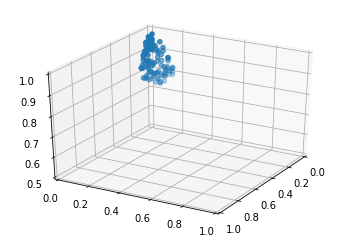

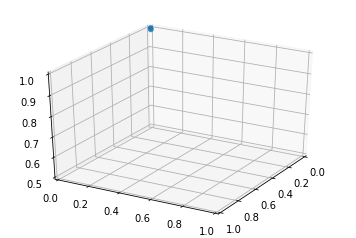

In [48]:
plot_points(points_to_plot_psi6_0_x1x2, 0.5)
plot_points(points_to_plot_psi6_n10_x1x2, 0.5)

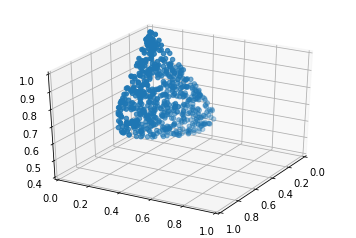

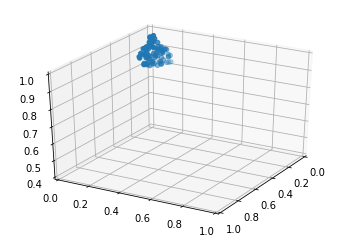

In [49]:
plot_points(points_to_plot_psi12_0_x1x2, 0.4)
plot_points(points_to_plot_psi12_n10_x1x2, 0.4)

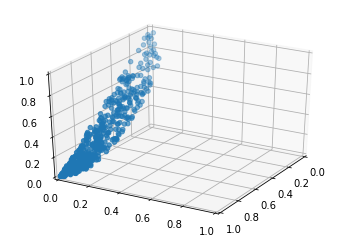

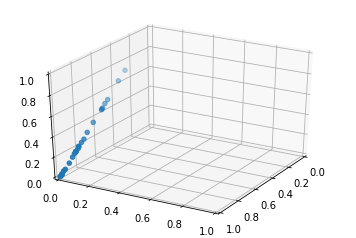

In [50]:
plot_points(points_to_plot_psi6_0_x1, 0)
plot_points(points_to_plot_psi6_n10_x1, 0)

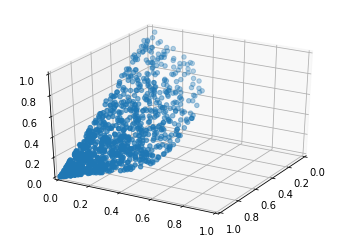

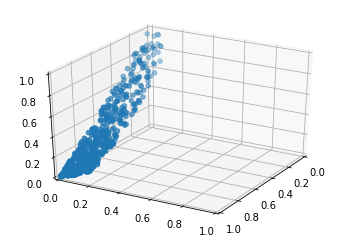

In [51]:
plot_points(points_to_plot_psi12_0_x1,0)
plot_points(points_to_plot_psi12_n10_x1, 0)